# Environment Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

import seaborn as sns

# Data

## Load

In [ ]:
!gdown --id 1-60NwQctpLKzM-7Ok7rYtwUeDSVaF6O7 -O /content/data.csv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-60NwQctpLKzM-7Ok7rYtwUeDSVaF6O7
To: /content/data.csv
100% 52.9k/52.9k [00:00<00:00, 77.9MB/s]


In [ ]:
df = pd.read_csv("/content/data.csv")

In [ ]:
df

,Unnamed: 0,Unnamed: 1,甲分類器,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,乙分類器,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,id,actual,1.000000,2.000000,3.000000,4.000000,NaN,1.000000,2.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4,0.271475,0.375280,0.347025,0.006220,NaN,0.199360,0.289965,0.235898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,0.106291,0.326531,0.442735,0.124443,NaN,0.125333,0.419889,0.009646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,0.252291,0.232986,0.292070,0.222653,NaN,0.251443,0.328626,0.235975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,0.419201,0.286819,0.162992,0.130988,NaN,0.359370,0.083785,0.359887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,296,3,0.197004,0.230437,0.390207,0.182352,NaN,0.390396,0.013842,0.162659,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,297,4,0.142427,0.232935,0.364361,0.260277,NaN,0.321511,0.507248,0.072504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,298,1,0.448272,0.148920,0.274030,0.128778,NaN,0.405680,0.038786,0.457028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,299,4,0.163382,0.113212,0.352721,0.370685,NaN,0.161242,0.032832,0.204800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing

In [ ]:
X_1 = df.iloc[1:, 2:6].values
X_2 = df.iloc[1:, 7:11].values

# parse y to numbers
y = df.iloc[1:, 1].values
y = y.astype(int)

y_class = y
y = y.reshape(-1,1)

In [ ]:
X_1[0], X_2[0], y[0], y_class[0]

(array([0.27147486, 0.37528009, 0.34702476, 0.0062203 ]),
 array([0.19935983, 0.28996544, 0.23589772, 0.27477702]),
 array([4]),
 4)

In [ ]:
# parse y to one-hot-encoding
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()

In [ ]:
y[0]

array([0., 0., 0., 1.])

# Quadratic Loss Function
For all instances:
N instances, C classes
$$
  L = E[\sum_{j=1}^{C}{(p_{j}-p_{j}^{*})^2}] = \frac{1}{N}\sum_{i=1}^{N}{\sum_{j=1}^{C}{(p_{ij}-p_{ij}^{*})^2}}
$$

In [ ]:
def quadratic_loss(pred, gt):
  loss = 0
  N = len(pred)

  for p, p_star in zip(pred, gt):
    se = np.sum((p - p_star) ** 2)
    loss += se

  return loss/N

In [ ]:
# 甲分類器的Quadratic loss
quadratic_loss_1 = quadratic_loss(X_1, y)

# 乙分類器的Quadratic loss
quadratic_loss_2 = quadratic_loss(X_2, y)

print(f"""
Q1:
  甲分類器的Quadratic loss: {quadratic_loss_1} \n
  乙分類器的Quadratic loss: {quadratic_loss_2} \n

  因為甲分類器的loss比較低，所以
  甲分類器的效能比較好
""")


Q1:
  甲分類器的Quadratic loss: 0.8046390383744482 

  乙分類器的Quadratic loss: 0.8412263175078561 


  因為甲分類器的loss比較低，所以
  甲分類器的效能比較好



# Information Loss
(Cross-Entropy)
For all instances: N instances, C classes
$$
  L = -\frac{1}{N}\sum_{i=1}^{N}{\sum_{j=1}^{C}{p_{ij}^{*}\log_2{p_{ij}}}}
$$

In [ ]:
def information_loss(pred, gt):
  loss = 0
  N = len(pred)

  for p, p_star in zip(pred, gt):
    entropy = -np.sum(p_star * np.log2(p))
    loss += entropy
  return loss/N

In [ ]:
# 甲分類器的Information loss
information_loss_1 = information_loss(X_1, y)

# 乙分類器的Information loss
information_loss_2 = information_loss(X_2, y)

print(f"""
Q2:
  甲分類器的Information loss: {information_loss_1} \n
  乙分類器的Information loss: {information_loss_2} \n

  因為甲分類器的loss比較低，所以
  甲分類器的效能比較好
""")


Q2:
  甲分類器的Information loss: 2.3227466647940984 

  乙分類器的Information loss: 2.408281259309044 


  因為甲分類器的loss比較低，所以
  甲分類器的效能比較好



# Comparison

In [ ]:
print("""
Q3:
  兩個指標的排序結果一樣，都是甲分類器比乙分類器好
""")


Q3:
  兩個指標的排序結果一樣，都是甲分類器比乙分類器好



In [ ]:
print("""
Q4: 一般而言，採用 quadratic loss 評比分類器的優劣所得的結論，是否保證與採用 informational loss 評比分類器的優劣所得的結論相同，說明原因。

Ans:
  一般而言，使用二次損失（Quadratic Loss）和信息損失（Informational Loss，Cross-Entrpy）來評估分類器的優劣可能不會得到相同的結論。
  這是因為這兩種損失函數在數學性質和對錯誤的懲罰方式上有本質的不同：

  1. 對於錯誤的懲罰方式不同：
  二次損失：對於接近正確答案的錯誤預測和遠離正確答案的錯誤預測，二次損失給予相對平緩的懲罰。換句話說，它不嚴厲地懲罰那些「差不多正確」的預測。
  信息損失（交叉熵損失）：這種損失函數對於那些與實際標籤差異很大的預測給予了更嚴厲的懲罰。特別是當預測的概率遠離真實標籤時，損失會急劇增加。

  2. 應用範圍和優化特性：
  二次損失：更常用於迴歸問題而不是分類問題。在分類問題中，使用二次損失可能不會給出最佳結果，因為它不是專門為處理概率輸出設計的。
  信息損失（交叉熵損失）：特別適用於分類問題，因為它直接處理概率分佈，並且在分類錯誤的情況下提供了更好的梯度反饋。

  3. 數學性質：
  二次損失 在某些情況下可能不會提供充足的梯度進行有效的優化，特別是當預測值和真實值差異很大時。 (e.g. pred: 0, ans: 1)
  信息損失 由於其對數組件的特性，在學習過程中提供了更穩定和有效的梯度更新。
  因此，這兩種損失函數在評估分類器時可能會導致不同的結論。在實際應用中，選擇哪種損失函數取決於具體的問題和所需的性能特性。
  通常，對於分類問題，信息損失（交叉熵損失）是一個更好的選擇，因為它直接對應於分類的概率性質。
""")


Q4: 一般而言，採用 quadratic loss 評比分類器的優劣所得的結論，是否保證與採用 informational loss 評比分類器的優劣所得的結論相同，說明原因。 

Ans:
  一般而言，使用二次損失（Quadratic Loss）和信息損失（Informational Loss，Cross-Entrpy）來評估分類器的優劣可能不會得到相同的結論。
  這是因為這兩種損失函數在數學性質和對錯誤的懲罰方式上有本質的不同：

  1. 對於錯誤的懲罰方式不同：
  二次損失：對於接近正確答案的錯誤預測和遠離正確答案的錯誤預測，二次損失給予相對平緩的懲罰。換句話說，它不嚴厲地懲罰那些「差不多正確」的預測。
  信息損失（交叉熵損失）：這種損失函數對於那些與實際標籤差異很大的預測給予了更嚴厲的懲罰。特別是當預測的概率遠離真實標籤時，損失會急劇增加。

  2. 應用範圍和優化特性：
  二次損失：更常用於迴歸問題而不是分類問題。在分類問題中，使用二次損失可能不會給出最佳結果，因為它不是專門為處理概率輸出設計的。
  信息損失（交叉熵損失）：特別適用於分類問題，因為它直接處理概率分佈，並且在分類錯誤的情況下提供了更好的梯度反饋。

  3. 數學性質：
  二次損失 在某些情況下可能不會提供充足的梯度進行有效的優化，特別是當預測值和真實值差異很大時。 (e.g. pred: 0, ans: 1)
  信息損失 由於其對數組件的特性，在學習過程中提供了更穩定和有效的梯度更新。
  因此，這兩種損失函數在評估分類器時可能會導致不同的結論。在實際應用中，選擇哪種損失函數取決於具體的問題和所需的性能特性。
  通常，對於分類問題，信息損失（交叉熵損失）是一個更好的選擇，因為它直接對應於分類的概率性質。



# Confusion Matrix

In [ ]:
# Get the actual class output by choosing the biggest probability
# add one to get the actual class
pred_1_class = np.argmax(X_1, axis=1) + 1
pred_2_class = np.argmax(X_2, axis=1) + 1

In [ ]:
pred_1_class, y_class

(array([2, 3, 3, 1, 1, 1, 4, 2, 3, 4, 2, 4, 3, 2, 4, 3, 3, 2, 1, 1, 3, 3,
        3, 2, 4, 3, 4, 1, 2, 2, 2, 2, 4, 4, 2, 3, 4, 1, 4, 1, 3, 2, 3, 3,
        4, 4, 3, 2, 2, 2, 2, 3, 1, 4, 3, 4, 2, 4, 2, 2, 2, 4, 4, 4, 1, 3,
        2, 1, 3, 4, 4, 2, 2, 1, 1, 3, 4, 3, 2, 1, 1, 2, 3, 1, 2, 1, 2, 2,
        1, 1, 3, 1, 4, 2, 3, 3, 2, 3, 1, 3, 2, 3, 4, 4, 1, 2, 3, 3, 1, 4,
        1, 1, 2, 2, 4, 2, 3, 2, 1, 3, 3, 2, 1, 3, 4, 4, 2, 2, 4, 4, 2, 2,
        1, 3, 1, 1, 1, 4, 3, 4, 1, 2, 1, 4, 2, 4, 3, 1, 3, 4, 4, 3, 2, 3,
        4, 4, 3, 3, 2, 3, 4, 1, 2, 3, 4, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1,
        2, 3, 1, 2, 1, 4, 1, 1, 1, 4, 2, 4, 3, 4, 4, 2, 2, 3, 1, 2, 4, 4,
        3, 1, 2, 2, 3, 3, 1, 4, 2, 3, 3, 4, 2, 4, 2, 3, 1, 1, 4, 1, 4, 2,
        4, 2, 1, 3, 4, 3, 3, 4, 3, 2, 2, 2, 3, 2, 1, 3, 4, 4, 4, 3, 2, 2,
        1, 4, 4, 2, 2, 1, 4, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 1, 4, 3, 4, 3, 4, 1, 2, 3, 1, 2, 2, 3, 3, 1, 4, 2, 1, 4, 2, 2,
        2, 1, 4, 4, 2, 2, 1, 2, 4, 3, 

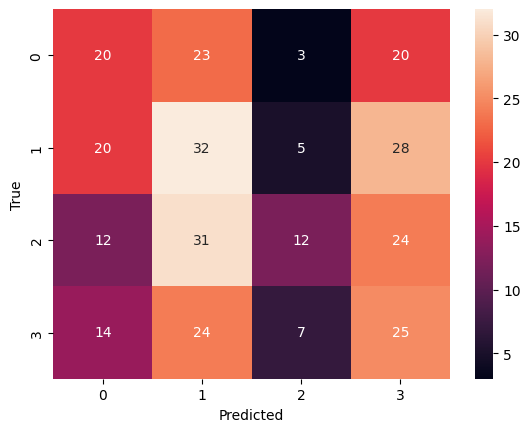

In [ ]:
# 甲的Confusion Matrix Q5
conf_matrix_1 = confusion_matrix(pred_1_class, y_class)

sns.heatmap(conf_matrix_1, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

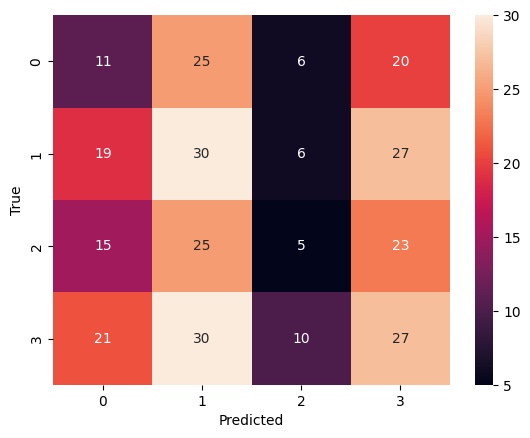

In [ ]:
# 乙的Confusion Matrix Q6
conf_matrix_2 = confusion_matrix(pred_2_class, y_class)

sns.heatmap(conf_matrix_2, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Q7
def macro_f1_score_v1(confusion_matrix):
    # 提取對角線元素，即每個類別的真陽性（True Positives）
    tp = np.diag(confusion_matrix)

    # 計算每個類別的假陽性（False Positives）和假陰性（False Negatives）
    fp = np.sum(confusion_matrix, axis=0) - tp
    fn = np.sum(confusion_matrix, axis=1) - tp

    # 計算每個類別的精確率和召回率
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    # 避免除以零
    precision = np.nan_to_num(precision)
    recall = np.nan_to_num(recall)

    # 計算每個類別的 F1 分數
    f1_scores = 2 * (precision * recall) / (precision + recall)

    # 計算宏平均 F1 分數
    macro_f1 = np.nanmean(f1_scores)
    return macro_f1

def macro_f1_score_v2(confusion_matrix):
  tp = np.diag(confusion_matrix)

  fp = np.sum(confusion_matrix, axis=0) - tp
  fn = np.sum(confusion_matrix, axis=1) - tp

  mean_precision = np.mean(tp / (tp + fp))
  mean_recall = np.mean(tp / (tp + fn))

  macro_f1 = 2 * (mean_precision * mean_recall) / (mean_precision + mean_recall)

  return macro_f1

In [ ]:
# 甲分類器的F1 score (first version)
f1_1_v1 = macro_f1_score_v1(conf_matrix_1)

# 甲分類器的F1 score (second version)
f1_1_v2 = macro_f1_score_v2(conf_matrix_1)

# 乙分類器的F1 score (first version)
f1_2_v1 = macro_f1_score_v1(conf_matrix_2)

# 乙分類器的F1 score (second version)
f1_2_v2 = macro_f1_score_v2(conf_matrix_2)

print(f"""
Q7:
  甲分類器的F1 score (first version): {f1_1_v1} \n

  甲分類器的F1 score (second version): {f1_1_v2} \n

  乙分類器的F1 score (first version): {f1_2_v1} \n

  乙分類器的F1 score (second version): {f1_2_v2}
""")


Q7:
  甲分類器的F1 score (first version): 0.28926293079496107 

      
  甲分類器的F1 score (second version): 0.31000011144896517 


  乙分類器的F1 score (first version): 0.22038251244665716 


  乙分類器的F1 score (second version): 0.22828948274110325



In [ ]:
# Q8
print("""
Q8:
  兩種F1 score對兩個分類器都有相同的評價，都是甲分類器優於乙分類器
  (甲的兩種F1 score都比乙的兩種F1 score大)
""")


Q8:
  兩種F1 score對兩個分類器都有相同的評價，都是甲分類器優於乙分類器
  (甲的兩種F1 score都比乙的兩種F1 score大)

